# Image Pre Processing

## 1. Importing The ImageDataGenerator Library

In [1]:
pwd

'/home/wsuser/work'

In [4]:
!pip install keras==2.2.4
!pip install tensorflow==2.7.3 

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.2.4 which is incompatible.
tensorflow-text 2.7.3 requires tensorflow<2.8,>=2.7.0, but you have tensorflow 2.11.0 which is incompatible.
autoai-ts-libs 1.1.9 requires tensorflow<2.8,>=2.7.0; python_version >= "3.9", but you have tensorflow 2.11.0 which is incompatible.
     |████████████████████████████████| 495.6 MB 43 kB/s /s eta 0:00:01████▊                           | 73.6 MB 11.3 MB/s eta 0:00:38         | 89.0 MB 11.3 MB/s eta 0:00:37B 100.9 MB/s eta 0:00:04�█████████▍                 | 223.6 MB 27.4 MB/s eta 0:00:10��▌               | 2

In [6]:
import tensorflow

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Image Data Augmentation

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

## 3. Apply ImageDataGenerator Functionality To Trainset And Testset

In [14]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xSQ_1uNu36qCYR4mNZWYdl6R8G8fUm-jhzk7xXIh1KhP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibmproject-donotdelete-pr-zdmdlrgfroxam7'
object_key = 'Car damage.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xSQ_1uNu36qCYR4mNZWYdl6R8G8fUm-jhzk7xXIh1KhP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibmproject-donotdelete-pr-zdmdlrgfroxam7'
object_key = 'Car damage.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [15]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [16]:
pwd

'/home/wsuser/work'

In [17]:
import os
filenames = os.listdir('/home/wsuser/work/Car damage/body/training')

In [20]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xSQ_1uNu36qCYR4mNZWYdl6R8G8fUm-jhzk7xXIh1KhP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ibmproject-donotdelete-pr-zdmdlrgfroxam7'
object_key = 'Car damage.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
training_set= train_datagen.flow_from_directory('/home/wsuser/work/Car damage/body/training',target_size = (224, 224),batch_size = 10,class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/home/wsuser/work/Car damage/body/validation',target_size = (224, 224),batch_size = 10,class_mode = 'categorical')

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


# Model Building
## 1.Importing The Model Building Libraries

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [22]:
IMAGE_SIZE = [224, 224]

train_path = '/home/wsuser/work/Car damage/body/training'
valid_path = '/home/wsuser/work/Car damage/body/validation'

## 2. Loading The Model

In [24]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

## 3. Adding Flatten Layer


In [27]:
for layer in vgg16.layers:
    layer.trainable = False

In [28]:
folders = glob('/home/wsuser/work/Car damage/body/training/*')

In [29]:
folders

['/home/wsuser/work/Car damage/body/training/01-rear',
 '/home/wsuser/work/Car damage/body/training/00-front',
 '/home/wsuser/work/Car damage/body/training/02-side']

In [30]:
x = Flatten()(vgg16.output)

In [31]:
len(folders)

3

## 4. Adding Output Layer


In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

## 5. Creating A Model Object


In [33]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 6. Compiling The Model

In [35]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## 7. Training The Model

In [36]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/wsuser/ipykernel_165/563002667.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
98/98 [==============================] - 349s 4s/step - loss: 1.3452 - accuracy: 0.5271 - val_loss: 1.1830 - val_accuracy: 0.5380
Epoch 2/25
98/98 [==============================] - 346s 4s/step - loss: 0.7620 - accuracy: 0.7171 - val_loss: 0.8515 - val_accuracy: 0.6608
Epoch 3/25
98/98 [==============================] - 349s 4s/step - loss: 0.4252 - accuracy: 0.8386 - val_loss: 0.8821 - val_accuracy: 0.6842
Epoch 4/25
98/98 [==============================] - 343s 4s/step - loss: 0.3511 - accuracy: 0.8631 - val_loss: 0.9000 - val_accuracy: 0.6842
Epoch 5/25
98/98 [==============================] - 348s 4s/step - loss: 0.2624 - accuracy: 0.9060 - val_loss: 0.9893 - val_accuracy: 0.6316
Epoch 6/25
98/98 [==============================] - 344s 4s/step - loss: 0.2016 - accuracy: 0.9234 - val_loss: 1.1700 - val_accuracy: 0.6433
Epoch 7/25
98/98 [==============================] - 346s 4s/step - loss: 0.2061 - accuracy: 0.9295 - val_loss: 0.9351 - val_accuracy: 0.6784
Epoch 8/25
98

## 8. Saving The Model

In [37]:
from tensorflow.keras.models import load_model
model.save('body.h5')

In [38]:
!tar -zcvf image-classification-model_new.tgz body.h5

body.h5


In [52]:
ls -1

body.h5
'Car damage'/
image-classification-model_new.tgz


In [54]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 10.2 MB/s eta 0:00:01


In [102]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "_KrnRAuGk2yTEVQGOZutaRDL-tDvMpwkwtuPWRbEPfnJ"
                  }
client=APIClient(wml_credentials)

In [103]:
client=APIClient(wml_credentials) 

In [104]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [105]:
space_uid = guid_from_space_name(client, 'imageclassification')
print("SpaceUID = "+ space_uid)

SpaceUID = a477761e-5761-4737-9e1e-812d7054b2eb


In [106]:
client.set.default_space(space_uid)

'SUCCESS'

In [107]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [118]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [121]:
 model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
 client.repository.ModelMetaNames.NAME:"CNN",
 client.repository.ModelMetaNames.TYPE:"tensorflow_rt22.1",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id=client.repository.get_model_id(model_details)

In [122]:
model_id

'361a0dd8-25e7-42c0-a8c7-d15d90530445'

In [124]:
client.repository.download(model_id,'my_model2.tar.gz')

Successfully saved model content to file: 'my_model2.tar.gz'


'/home/wsuser/work/my_model2.tar.gz'

In [53]:
! pip install cv


In [48]:
!pip install opencv-python

## 9. Testing The Model

In [50]:
!pip install opencv-contrib-python

     |████████████████████████████████| 67.1 MB 110 kB/s  eta 0:00:01


In [125]:
from tensorflow.keras.models import load_model
from skimage.transform import resize

In [126]:
import numpy as np

In [128]:
!pip install opencv-python-headless

     |████████████████████████████████| 48.3 MB 16.4 MB/s eta 0:00:01


In [129]:
import cv2

In [130]:
model = load_model('body.h5')

In [131]:
def detect(frame):
  img = cv2.resize(frame,(224,224))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  if(np.max(img)>1):
    img = img/255.0
  img = np.array([img])
  prediction = model.predict(img)
  label = ["front","rear","side"]
  preds = label[np.argmax(prediction)]
  return preds

In [132]:
import numpy as np

In [133]:
from PIL import Image

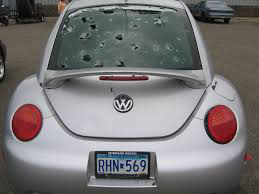

In [137]:
Image.open("/home/wsuser/work/Car damage/body/validation/01-rear/0004.JPEG")

In [138]:
data = "/home/wsuser/work/Car damage/body/validation/01-rear/0004.JPEG"
image = cv2.imread(data)
print(detect(image))

rear
